# Fitting binomial GLM for egg predation

## General GLM for super-classes

### requiered packages

In [1]:
library(tidyr)
library(lme4)
library(sjPlot)
library(ggplot2)
# library(MASS)
library(dplyr)
library(MuMIn)
library(pkgcond)

Warning message:
"le package 'tidyr' a été compilé avec la version R 4.1.3"
Warning message:
"le package 'lme4' a été compilé avec la version R 4.1.3"
Le chargement a nécessité le package : Matrix


Attachement du package : 'Matrix'


Les objets suivants sont masqués depuis 'package:tidyr':

    expand, pack, unpack


Warning message:
"le package 'sjPlot' a été compilé avec la version R 4.1.3"
Warning message:
"le package 'ggplot2' a été compilé avec la version R 4.1.3"
Warning message:
"le package 'dplyr' a été compilé avec la version R 4.1.3"

Attachement du package : 'dplyr'


Les objets suivants sont masqués depuis 'package:stats':

    filter, lag


Les objets suivants sont masqués depuis 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"le package 'MuMIn' a été compilé avec la version R 4.1.3"
Warning message:
"le package 'pkgcond' a été compilé avec la version R 4.1.3"

Attachement du package : 'pkgcond'


L'objet suivant est masqué depuis 'package:dpl

### Reading and processing data

In [2]:
# sentinel preys recap
dataPS = read.table('data/recap_PS_sans_RT.csv', h=T, sep = ',') 

# image analysis recap
data = read.table('data/analyse_clean.csv', h=T, sep = ',')

In [3]:
# cleaner names
data = data %>% 
  mutate(name = paste(obj_class, species, sep = "_"))%>%
  rename(spot=session)

dataPS_short= dataPS%>%select(spot,weevils_out,eggs_out,plot)

# join
data_temp = inner_join(dataPS_short,data)

# get sum of contact with eggs for each class
data_sum = data_temp%>%
  group_by(spot,obj_class)%>%
  mutate(variable=contact_egg)%>%
  summarise(sum_variable = sum(variable))

data_sum = inner_join(dataPS_short, data_sum)

# get cleaner predation rate
data_sum = data_sum%>%
  mutate(prop = 1 -(eggs_out/10))

head(data_sum)

# spread data for glm
data_spread = data_sum%>%
  spread(obj_class,sum_variable)

data_spread[is.na(data_spread)] = 0

head(data_spread)

# for weights in glm
data_spread$nb_eggs = 10

summary(data_spread)

length(data_spread[,1])

head(data_spread)

Joining, by = "spot"
`summarise()` has grouped output by 'spot'. You can override using the `.groups` argument.
Joining, by = "spot"


spot weevils_out eggs_out plot obj_class sum_variable prop
1 1BM1 2           4        BM   ant       3            0.6 
2 4BM1 2           4        BM   diptere   0            0.6 
3 4BM1 2           4        BM   slug      0            0.6 
4 4BM1 2           4        BM   spider    0            0.6 
5 4BM1 2           4        BM   weevil    0            0.6 
6 1BM2 2           5        BM   ant       1            0.5

spot weevils_out eggs_out plot prop ant aphid cloporte cocci cockroach ...
1 1BM1 2            4       BM   0.6  3   0     0        0     0         ...
2 1BM2 2            5       BM   0.5  1   0     1        0     0         ...
3 1BM3 2            5       BM   0.5  0   0     0        0     0         ...
4 1BM4 2            5       BM   0.5  3   0     1        0     1         ...
5 1BM5 2            0       BM   1.0  1   0     0        0     0         ...
6 1LP1 2           10       LP   0.0  1   0     0        0     0         ...
  hemiptere hymeno iule lepi lombric ortho slug snail spider weevil
1 0         0      0    0    0       0     0    0     0      0     
2 0         0      0    0    0       0     0    0     0      0     
3 0         0      0    0    0       0     1    0     0      0     
4 0         0      0    0    0       0     0    0     0      0     
5 0         0      0    0    0       0     0    0     0      0     
6 0         0      0    0    0       0     0    0     0      0

     spot            weevils_out       eggs_out          plot          
 Length:116         Min.   :0.000   Min.   : 0.000   Length:116        
 Class :character   1st Qu.:0.000   1st Qu.: 0.000   Class :character  
 Mode  :character   Median :2.000   Median : 4.000   Mode  :character  
                    Mean   :1.319   Mean   : 4.034                     
                    3rd Qu.:2.000   3rd Qu.: 7.000                     
                    Max.   :2.000   Max.   :10.000                     
      prop             ant            aphid      cloporte           cocci  
 Min.   :0.0000   Min.   :0.000   Min.   :0   Min.   :0.00000   Min.   :0  
 1st Qu.:0.3000   1st Qu.:0.000   1st Qu.:0   1st Qu.:0.00000   1st Qu.:0  
 Median :0.6000   Median :0.000   Median :0   Median :0.00000   Median :0  
 Mean   :0.5966   Mean   :0.681   Mean   :0   Mean   :0.06897   Mean   :0  
 3rd Qu.:1.0000   3rd Qu.:1.000   3rd Qu.:0   3rd Qu.:0.00000   3rd Qu.:0  
 Max.   :1.0000   Max.   :5.000   Max.  

[1] 116

spot weevils_out eggs_out plot prop ant aphid cloporte cocci cockroach ...
1 1BM1 2            4       BM   0.6  3   0     0        0     0         ...
2 1BM2 2            5       BM   0.5  1   0     1        0     0         ...
3 1BM3 2            5       BM   0.5  0   0     0        0     0         ...
4 1BM4 2            5       BM   0.5  3   0     1        0     1         ...
5 1BM5 2            0       BM   1.0  1   0     0        0     0         ...
6 1LP1 2           10       LP   0.0  1   0     0        0     0         ...
  hymeno iule lepi lombric ortho slug snail spider weevil nb_eggs
1 0      0    0    0       0     0    0     0      0      10     
2 0      0    0    0       0     0    0     0      0      10     
3 0      0    0    0       0     1    0     0      0      10     
4 0      0    0    0       0     0    0     0      0      10     
5 0      0    0    0       0     0    0     0      0      10     
6 0      0    0    0       0     0    0     0      0      10

### Fit GLM for super-classes

In [4]:
# first raw glm with all factors
# Adaptive Gauss-Hermite Quadrature chosed as an optimizer as it is best fited for binomial variables
# will give warnings and is largely overfitted

m1 = glmer(prop ~ ant + cloporte + colemboles + diptere + snail + spider + slug + derma + coleo + cockroach + (1|plot),nAGQ=0, weights=nb_eggs, family = 'binomial', data = data_spread)
drop1(m1, test="Chisq")

#remove the variable with the greatest p-value
#snail         1 792.96  0.001  0.973566  
m2 = glmer(prop ~ ant + cloporte + colemboles + diptere + spider + slug + derma + coleo + cockroach + (1|plot),nAGQ=0, weights=nb_eggs, family = 'binomial', data = data_spread)
drop1(m2, test="Chisq")


#remove the variable with the greatest p-value
#cloporte      1 791.49  0.527  0.467975   
m3 = glmer(prop ~ ant + colemboles + diptere + spider + slug + derma + coleo + cockroach + (1|plot),nAGQ=0, weights=nb_eggs, family = 'binomial', data = data_spread)
drop1(m3, test="Chisq")

#remove the variable with the greatest p-value
#diptere       1 790.75  1.267  0.260385  
m4 = glmer(prop ~ ant + colemboles + spider + slug + derma + coleo + cockroach + (1|plot),nAGQ=0, weights=nb_eggs, family = 'binomial', data = data_spread)
drop1(m4, test="Chisq")

#remove the variable with the greatest p-value
#colemboles    1 790.05  1.293  0.255442 
m5 = glmer(prop ~ ant + spider + slug + derma + coleo + cockroach + (1|plot),nAGQ=0, weights=nb_eggs, family = 'binomial', data = data_spread)
drop1(m5, test="Chisq")

#remove the variable with the greatest p-value
#derma        1 789.85  1.800  0.179747    
m6 = glmer(prop ~ ant + spider + slug + coleo + cockroach + (1|plot),nAGQ=0, weights=nb_eggs, family = 'binomial', data = data_spread)
drop1(m6, test="Chisq")

#remove the variable with the greatest p-value
#spider       1 790.31  2.460  0.116799 
m7 = glmer(prop ~ ant + slug + coleo + cockroach + (1|plot),nAGQ=0, weights=nb_eggs, family = 'binomial', data = data_spread)
drop1(m7, test="Chisq")

#remove the variable with the greatest p-value
#coleo        1 791.26  2.955  0.085634 .  
m8 = glmer(prop ~ ant + slug + cockroach + (1|plot),nAGQ=0, weights=nb_eggs, family = 'binomial', data = data_spread)
drop1(m8, test="Chisq")

npar AIC      LRT          Pr(Chi)     
<none>     NA   794.9597           NA           NA
ant         1   856.8967 63.937055118 1.284586e-15
cloporte    1   793.4856  0.525942757 4.683176e-01
colemboles  1   794.4145  1.454834647 2.277538e-01
diptere     1   794.1448  1.185196484 2.763006e-01
snail       1   792.9607  0.001097972 9.735664e-01
spider      1   795.7804  2.820779735 9.305119e-02
slug        1   836.7053 43.745627421 3.739511e-11
derma       1   794.7885  1.828870029 1.762611e-01
coleo       1   795.5902  2.630541095 1.048260e-01
cockroach   1   800.6456  7.685961345 5.565203e-03

npar AIC      LRT        Pr(Chi)     
<none>     NA   792.9607         NA           NA
ant         1   854.9713 64.0105438 1.237551e-15
cloporte    1   791.4875  0.5267536 4.679749e-01
colemboles  1   792.4261  1.4653881 2.260748e-01
diptere     1   792.1474  1.1866186 2.760127e-01
spider      1   793.7911  2.8303325 9.249921e-02
slug        1   836.1944 45.2336719 1.748724e-11
derma       1   792.8975  1.9367133 1.640258e-01
coleo       1   793.5980  2.6372534 1.043839e-01
cockroach   1   798.6555  7.6947874 5.538053e-03

npar AIC      LRT       Pr(Chi)     
<none>     NA   791.4875        NA           NA
ant         1   852.9944 63.506893 1.598067e-15
colemboles  1   791.0674  1.579885 2.087773e-01
diptere     1   790.7542  1.266707 2.603854e-01
spider      1   792.1845  2.697006 1.005369e-01
slug        1   834.6281 45.140605 1.833834e-11
derma       1   791.3616  1.874106 1.710055e-01
coleo       1   792.1171  2.629616 1.048871e-01
cockroach   1   797.2458  7.758313 5.346587e-03

npar AIC      LRT       Pr(Chi)     
<none>     NA   790.7542        NA           NA
ant         1   851.0027 62.248457 3.027461e-15
colemboles  1   790.0475  1.293294 2.554417e-01
spider      1   791.1173  2.363080 1.242367e-01
slug        1   835.4577 46.703494 8.258162e-12
derma       1   790.6371  1.882851 1.700104e-01
coleo       1   791.3061  2.551937 1.101591e-01
cockroach   1   796.0758  7.321640 6.812922e-03

npar AIC      LRT       Pr(Chi)     
<none>    NA   790.0475        NA           NA
ant        1   852.9538 64.906280 7.854636e-16
spider     1   790.6408  2.593329 1.073146e-01
slug       1   833.5854 45.537933 1.497111e-11
derma      1   789.8472  1.799712 1.797473e-01
coleo      1   790.7893  2.741757 9.775724e-02
cockroach  1   795.6801  7.632548 5.732427e-03

npar AIC      LRT       Pr(Chi)     
<none>    NA   789.8472        NA           NA
ant        1   850.9869 63.139690 1.925548e-15
spider     1   790.3070  2.459734 1.167986e-01
slug       1   833.0978 45.250545 1.733723e-11
coleo      1   790.6717  2.824511 9.283518e-02
cockroach  1   795.4854  7.638195 5.714507e-03

npar AIC      LRT       Pr(Chi)     
<none>    NA   790.3070        NA           NA
ant        1   850.0118 61.704871 3.989920e-15
slug       1   833.4031 45.096192 1.875899e-11
coleo      1   791.2615  2.954582 8.563446e-02
cockroach  1   795.4918  7.184805 7.352356e-03

npar AIC      LRT       Pr(Chi)     
<none>    NA   791.2615        NA           NA
ant        1   849.7851 60.523609 7.270126e-15
slug       1   833.6151 44.353610 2.741060e-11
cockroach  1   798.9421  9.680565 1.862274e-03

Generalized linear mixed model fit by maximum likelihood (Adaptive
  Gauss-Hermite Quadrature, nAGQ = 0) [glmerMod]
 Family: binomial  ( logit )
Formula: prop ~ ant + slug + cockroach + (1 | plot)
   Data: data_spread
Weights: nb_eggs

     AIC      BIC   logLik deviance df.resid 
   791.3    805.0   -390.6    781.3      111 

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-4.917 -1.792  0.501  1.651  4.135 

Random effects:
 Groups Name        Variance Std.Dev.
 plot   (Intercept) 0.3008   0.5484  
Number of obs: 116, groups:  plot, 5

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -0.3069     0.2636  -1.164  0.24429    
ant           0.6190     0.0875   7.073 1.51e-12 ***
slug          0.8405     0.1378   6.102 1.05e-09 ***
cockroach     0.4071     0.1387   2.936  0.00333 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
          (Intr) ant    slug  
ant       -0.217              
slug     

(Intercept) ant       slug     cockroach
BM -1.15530296 0.6189462 0.840525 0.4071142
LP  0.08348538 0.6189462 0.840525 0.4071142
PC -0.41388265 0.6189462 0.840525 0.4071142
PE  0.39436016 0.6189462 0.840525 0.4071142
SL -0.44298438 0.6189462 0.840525 0.4071142

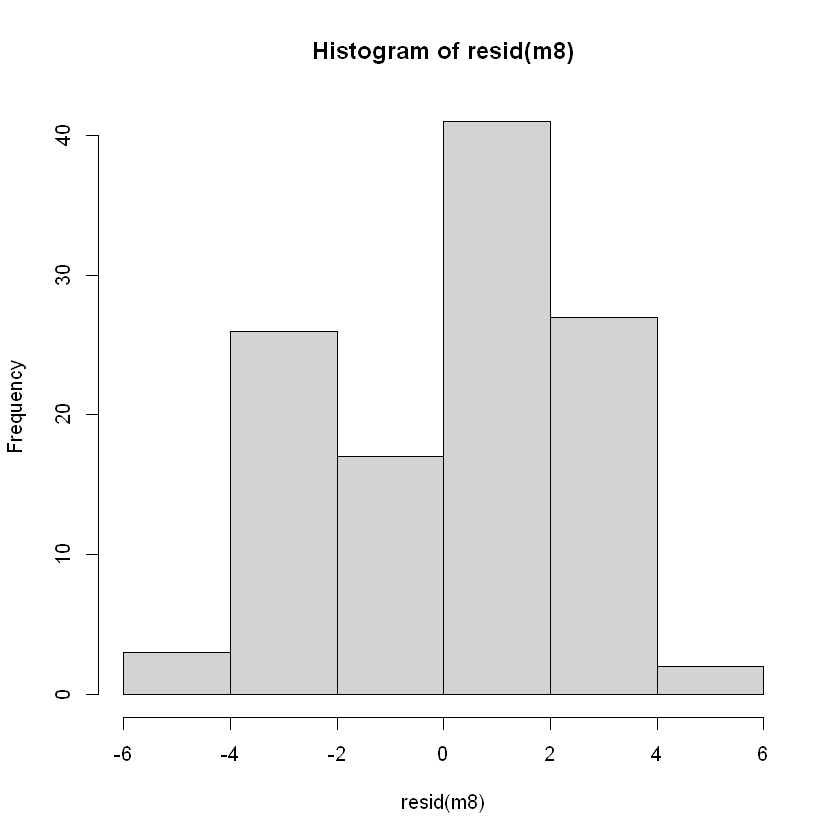

Warning message:
"'r.squaredGLMM' now calculates a revised statistic. See the help page."
Warning message:
"the null model is correct only if all variables used by the original model remain unchanged."


R2m       R2c      
theoretical 0.1917673 0.2594710
delta       0.1604657 0.2171183

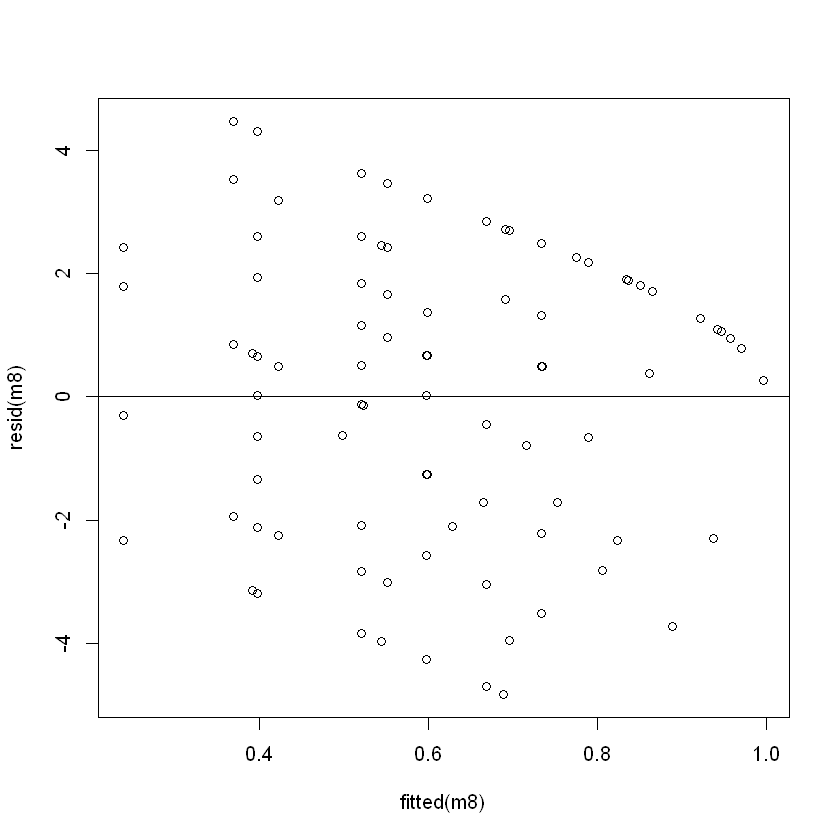

In [5]:
# selected model
summary(m8)
coef(m8)$plot
hist(resid(m8), breaks=4)

plot(resid(m8)~fitted(m8))
abline(h=0)

r.squaredGLMM(m8)

### Plot Fitted GLM

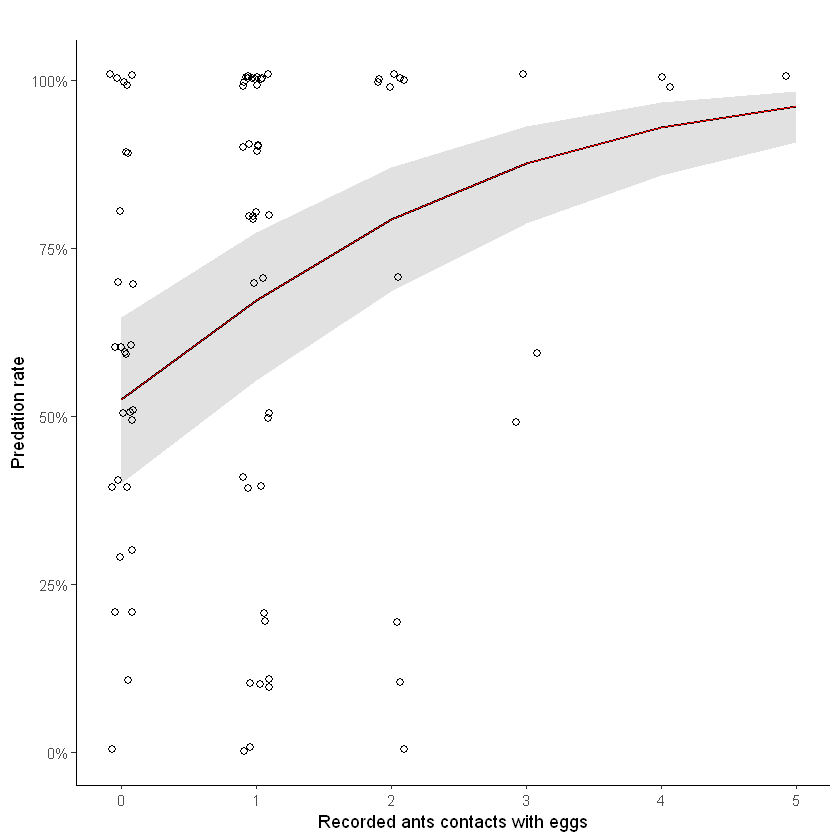

In [18]:
# Ants

plot_model(m8, type = c("pred"))[[1]]+
geom_line(col='red')+
geom_point(data=data_sum[data_sum$obj_class == 'ant',],aes(x=sum_variable,y=prop), 
           position = position_jitter(w = 0.1, h = 0.01,seed=42), 
            col= 'black',shape=1, size=2)+
theme_classic()+
labs(title="", x ="Recorded ants contacts with eggs", y = "Predation rate")

ggsave('figs/ant_contact_pred.png', width = 13, height = 13, unit = 'cm', dpi=300)

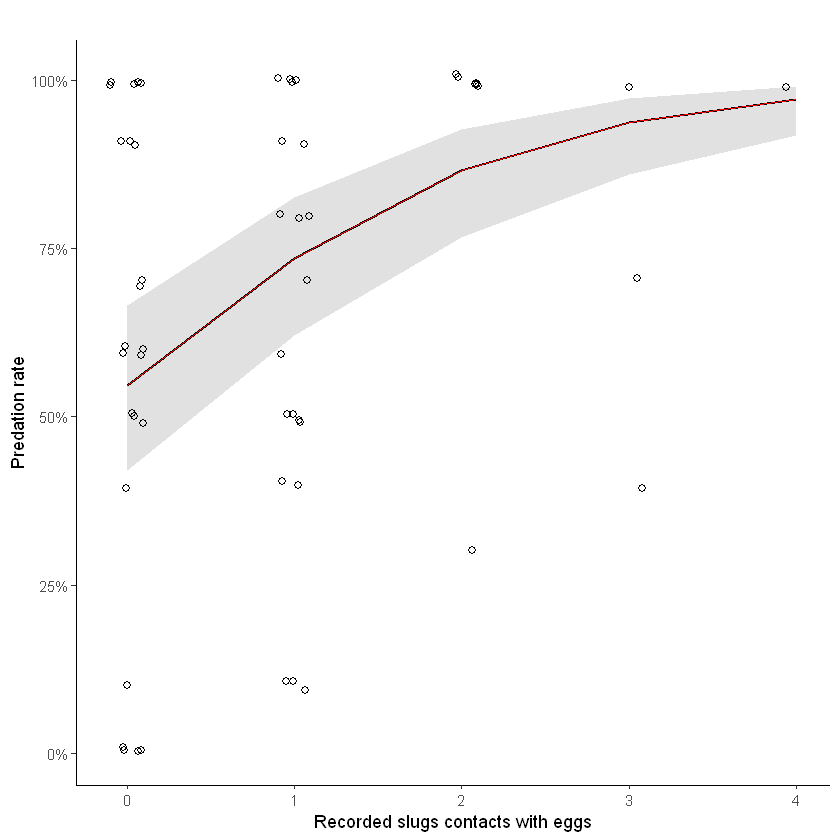

In [19]:
# Slugs

plot_model(m8, type = c("pred"))[[2]]+
geom_line(col='red')+
geom_point(data=data_sum[data_sum$obj_class == 'slug',],aes(x=sum_variable,y=prop), 
           position = position_jitter(w = 0.1, h = 0.01,seed=42), 
            col= 'black',shape=1, size=2)+
theme_classic()+
labs(title="", x ="Recorded slugs contacts with eggs", y = "Predation rate")

ggsave('figs/slug_contact_pred.png', width = 13, height = 13, unit = 'cm', dpi=300)

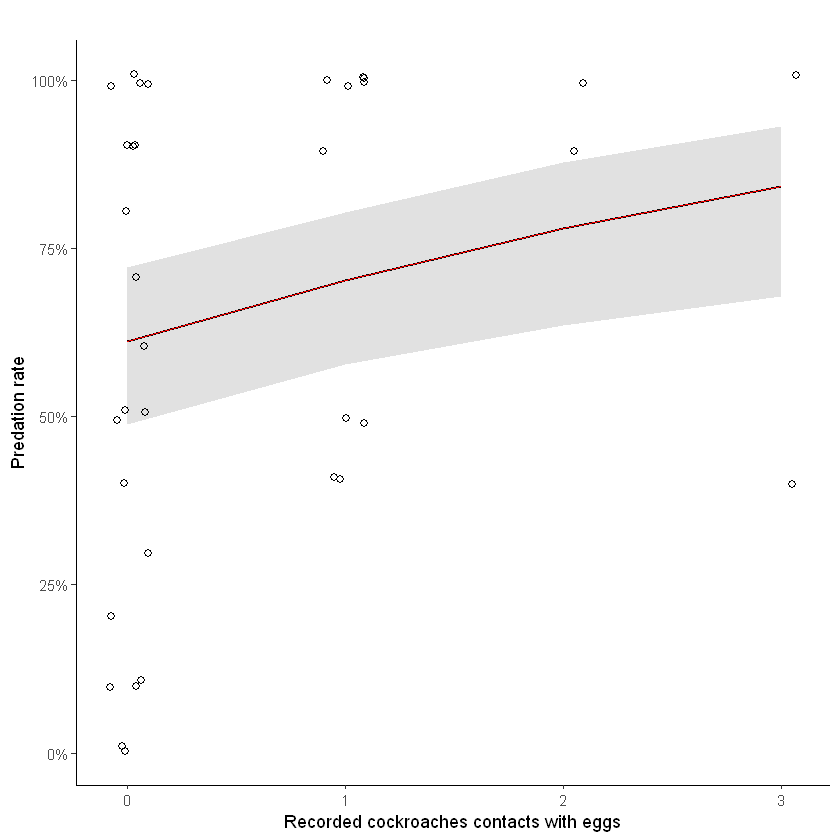

In [20]:
# Cockroaches

plot_model(m8, type = c("pred"))[[3]]+
geom_line(col='red')+
geom_point(data=data_sum[data_sum$obj_class == 'cockroach',],aes(x=sum_variable,y=prop), 
           position = position_jitter(w = 0.1, h = 0.01,seed=42), 
            col= 'black',shape=1, size=2)+
theme_classic()+
labs(title="", x ="Recorded cockroaches contacts with eggs", y = "Predation rate")

ggsave('figs/cockroach_contact_pred.png', width = 13, height = 13, unit = 'cm', dpi=300)

## GLM detailling ant species

### Requiered packages

In [9]:
library(tidyr)
library(lme4)
library(sjPlot)
library(ggplot2)
# library(MASS)
library(dplyr)
library(MuMIn)
library(pkgcond)

### Reading and organizing data

In [10]:
# same data
dataPS = read.table('data/recap_PS_sans_RT.csv', h=T, sep = ',') 
data = read.table('data/analyse_clean.csv', h=T, sep = ',')
data = data %>% 
  mutate(name = paste(obj_class, species, sep = "_"))%>%
  rename(spot=session)
dataPS_short= dataPS%>%select(spot,eggs_out,plot)
data_temp = inner_join(dataPS_short,data)

#data_temp$obj_class<-as.factor(data_temp$obj_class)

# get ants only
data_ant = data_temp%>%
  filter(obj_class == 'slug' | obj_class == 'ant' | obj_class == 'cockroach')

data_ant <- data_ant %>% 
  mutate(new_class = case_when(( obj_class=='ant' ~ as.character(species)), 
                               (obj_class=='slug' ~ as.character(obj_class)), 
                               (obj_class=='cockroach' ~ as.character(obj_class))))


# sum of contacts as before
data_ant = data_ant%>%
  group_by(spot,new_class)%>%
  mutate(variable=contact_egg)%>%
  summarise(sum_variable = sum(variable))

data_ant = inner_join(dataPS_short, data_ant)

# get predation rate
data_ant = data_ant%>%
  mutate(prop = 1 -(eggs_out/10))

head(data_ant)

# spread data

data_sprant = data_ant%>%
  spread(new_class,sum_variable)

data_sprant[is.na(data_sprant)] = 0

data_sprant$nb_essai = 10


head(data_sprant)

Joining, by = "spot"
`summarise()` has grouped output by 'spot'. You can override using the `.groups` argument.
Joining, by = "spot"


spot eggs_out plot new_class sum_variable prop
1 1BM1  4       BM   techno    3            0.6 
2 4BM1  4       BM   slug      0            0.6 
3 1BM2  5       BM   cockroach 0            0.5 
4 1BM2  5       BM   techno    1            0.5 
5 2BM2  9       BM   para      1            0.1 
6 3BM2 10       BM   slug      0            0.0

spot eggs_out plot prop brachy cockroach mono para pheidole slug solenopsis
1 1BM1  4       BM   0.6  0      0         0    0    0        0    0         
2 1BM2  5       BM   0.5  0      0         0    0    0        0    0         
3 1BM3  5       BM   0.5  0      0         0    0    0        1    0         
4 1BM4  5       BM   0.5  0      1         0    0    0        0    3         
5 1BM5  0       BM   1.0  0      0         0    1    0        0    0         
6 1LP1 10       LP   0.0  0      0         0    0    0        0    0         
  techno tetra unclear nb_essai
1 3      0     0       10      
2 1      0     0       10      
3 0      0     0       10      
4 0      0     0       10      
5 0      0     0       10      
6 0      0     1       10

npar AIC      LRT       Pr(Chi)     
<none>     NA   623.3799        NA           NA
brachy      1   640.0910 18.711112 1.520935e-05
solenopsis  1   667.4035 46.023631 1.168352e-11
pheidole    1   622.4450  1.065082 3.020591e-01
para        1   662.1788 40.798929 1.687255e-10
techno      1   628.1494  6.769532 9.272713e-03
slug        1   640.1207 18.740820 1.497425e-05
cockroach   1   628.7656  7.385659 6.574598e-03

Generalized linear mixed model fit by maximum likelihood (Adaptive
  Gauss-Hermite Quadrature, nAGQ = 0) [glmerMod]
 Family: binomial  ( logit )
Formula: prop ~ brachy + solenopsis + pheidole + para + techno + slug +  
    cockroach + (1 | plot)
   Data: data_sprant
Weights: nb_essai

     AIC      BIC   logLik deviance df.resid 
   623.4    647.2   -302.7    605.4       95 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.3269 -1.3343  0.3932  1.4513  3.8190 

Random effects:
 Groups Name        Variance Std.Dev.
 plot   (Intercept) 0.4027   0.6346  
Number of obs: 104, groups:  plot, 5

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.04496    0.30582  -0.147   0.8831    
brachy      -1.22200    0.29273  -4.175 2.99e-05 ***
solenopsis   0.80879    0.13557   5.966 2.43e-09 ***
pheidole    -0.26378    0.25604  -1.030   0.3029    
para         1.63814    0.30320   5.403 6.56e-08 ***
techno       0.50467    0.19879   2.539   0.0111 *  
slu

npar AIC      LRT       Pr(Chi)     
<none>     NA   622.4450        NA           NA
brachy      1   638.6989 18.253933 1.933264e-05
solenopsis  1   667.0660 46.621040 8.613049e-12
para        1   662.0647 41.619700 1.108704e-10
techno      1   627.3559  6.910901 8.567179e-03
slug        1   640.3291 19.884081 8.228265e-06
cockroach   1   628.2195  7.774510 5.298858e-03

Generalized linear mixed model fit by maximum likelihood (Adaptive
  Gauss-Hermite Quadrature, nAGQ = 0) [glmerMod]
 Family: binomial  ( logit )
Formula: prop ~ brachy + solenopsis + para + techno + slug + cockroach +  
    (1 | plot)
   Data: data_sprant
Weights: nb_essai

     AIC      BIC   logLik deviance df.resid 
   622.4    643.6   -303.2    606.4       96 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.1129 -1.3588  0.3927  1.4554  3.8302 

Random effects:
 Groups Name        Variance Std.Dev.
 plot   (Intercept) 0.3935   0.6273  
Number of obs: 104, groups:  plot, 5

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.07741    0.30128  -0.257  0.79722    
brachy      -1.20383    0.29186  -4.125 3.71e-05 ***
solenopsis   0.81505    0.13571   6.006 1.90e-09 ***
para         1.65194    0.30316   5.449 5.06e-08 ***
techno       0.51086    0.19907   2.566  0.01028 *  
slug         0.62246    0.14880   4.183 2.88e-05 ***
cockroach    0

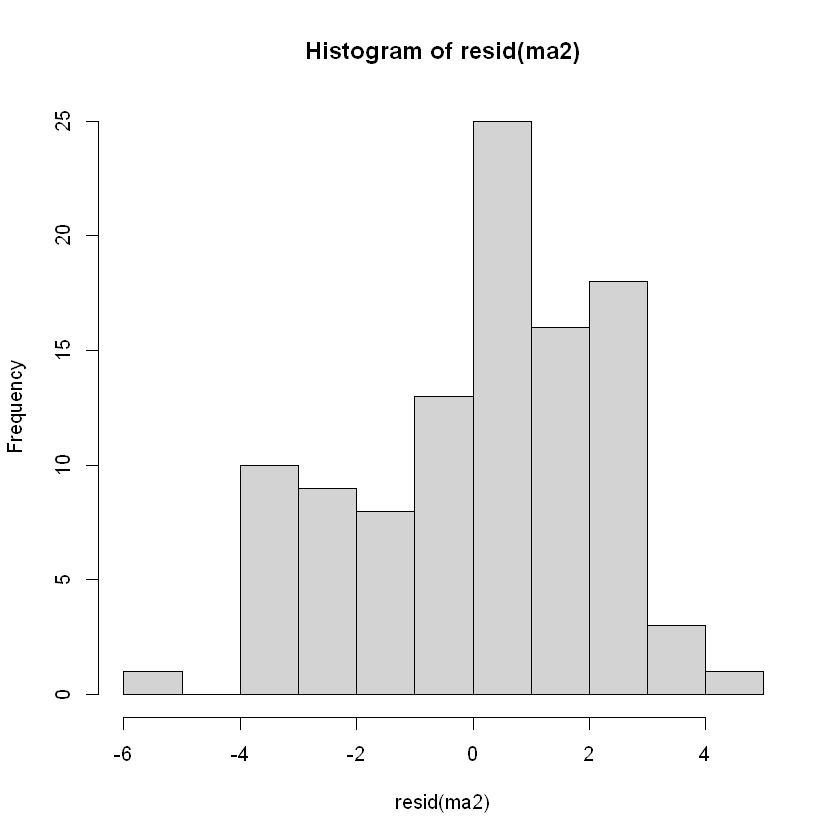

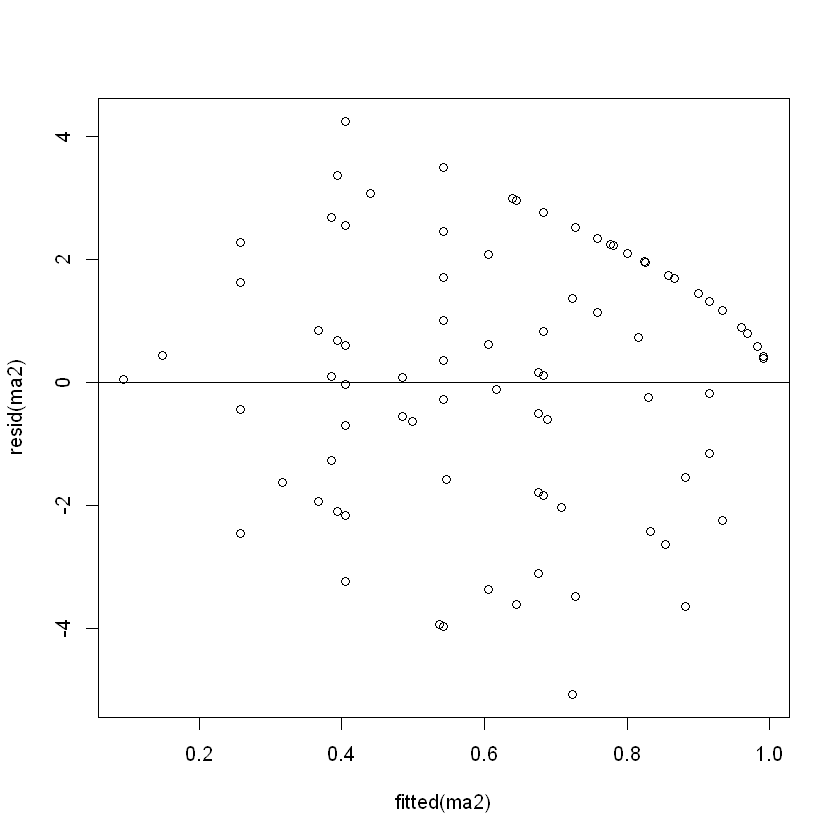

Warning message:
"the null model is correct only if all variables used by the original model remain unchanged."


R2m       R2c      
theoretical 0.2390693 0.3203572
delta       0.1983197 0.2657520

npar AIC      LRT       Pr(Chi)     
<none>     NA   627.3559        NA           NA
brachy      1   643.1841 17.828260 2.417657e-05
solenopsis  1   671.6622 46.306271 1.011397e-11
para        1   664.8549 39.499017 3.282246e-10
slug        1   642.3386 16.982731 3.772136e-05
cockroach   1   632.8818  7.525913 6.081771e-03

Generalized linear mixed model fit by maximum likelihood (Adaptive
  Gauss-Hermite Quadrature, nAGQ = 0) [glmerMod]
 Family: binomial  ( logit )
Formula: prop ~ brachy + solenopsis + para + slug + cockroach + (1 | plot)
   Data: data_sprant
Weights: nb_essai

     AIC      BIC   logLik deviance df.resid 
   627.4    645.9   -306.7    613.4       97 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.2699 -1.2586  0.4476  1.4626  3.7598 

Random effects:
 Groups Name        Variance Std.Dev.
 plot   (Intercept) 0.3325   0.5767  
Number of obs: 104, groups:  plot, 5

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.01641    0.27895  -0.059  0.95309    
brachy      -1.19397    0.29259  -4.081 4.49e-05 ***
solenopsis   0.80241    0.13396   5.990 2.10e-09 ***
para         1.58533    0.29759   5.327 9.98e-08 ***
slug         0.55885    0.14340   3.897 9.73e-05 ***
cockroach    0.37007    0.14316   2.585  0.00974 ** 
---
Signif. codes:  0 '***' 0

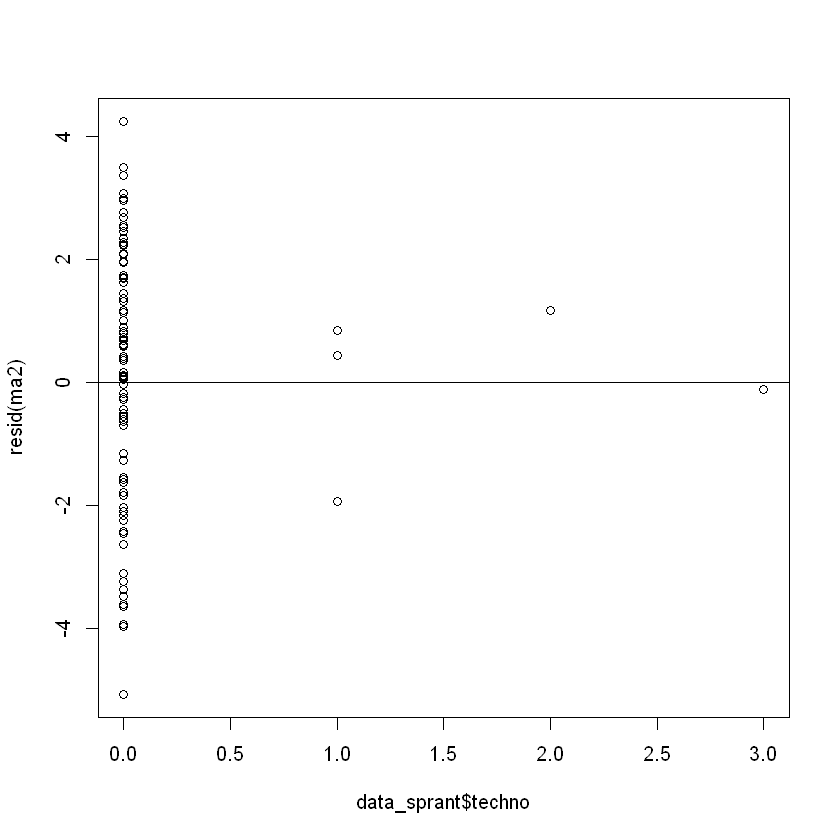

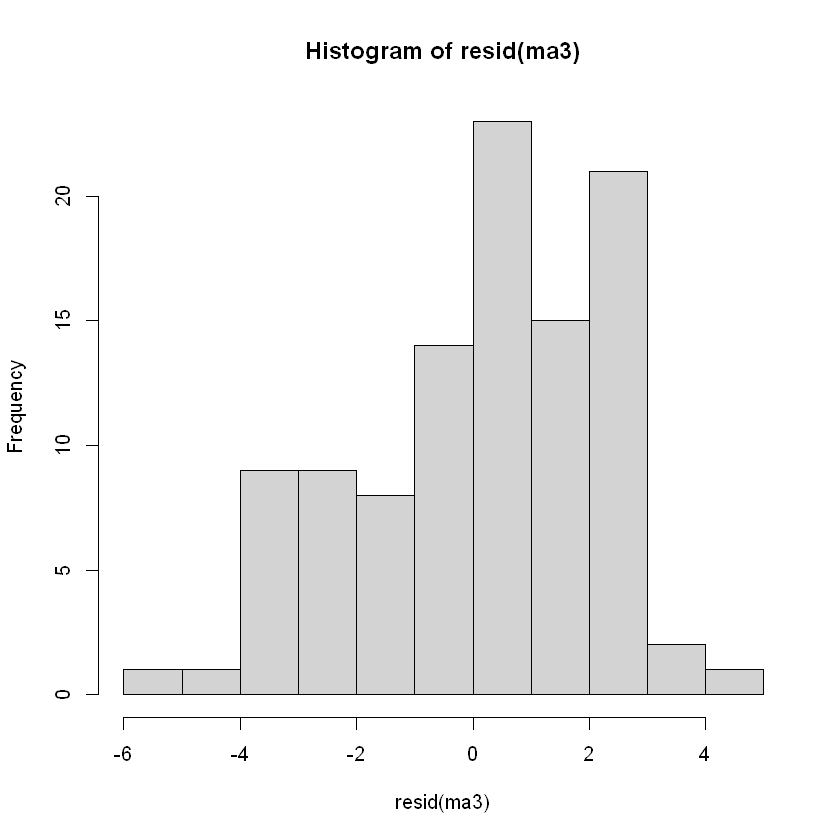

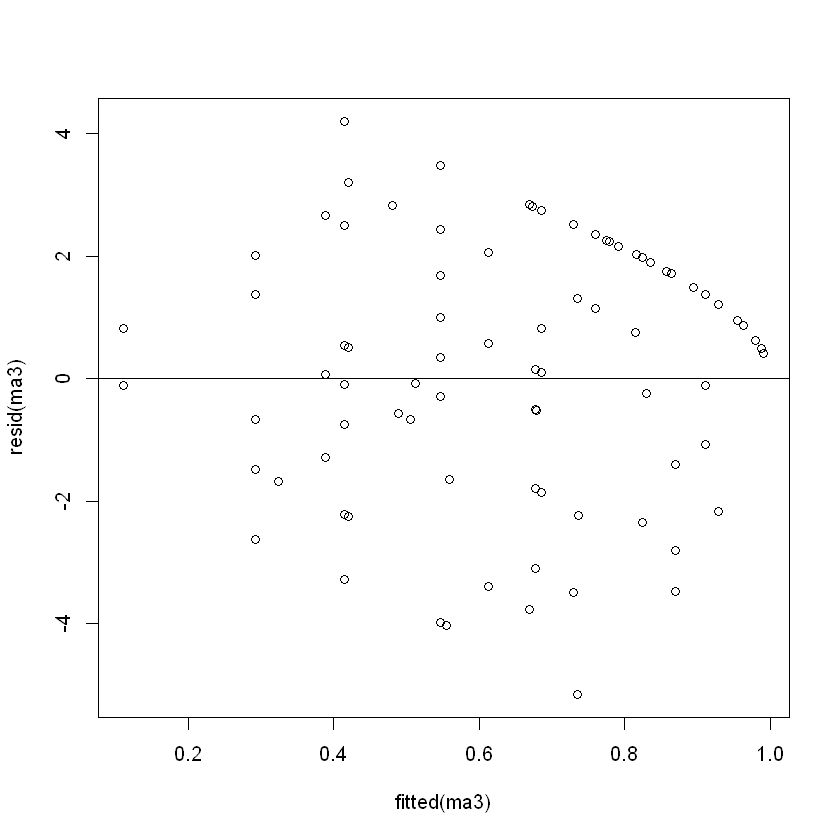

Warning message:
"the null model is correct only if all variables used by the original model remain unchanged."


R2m       R2c      
theoretical 0.2270237 0.2979828
delta       0.1872763 0.2458120

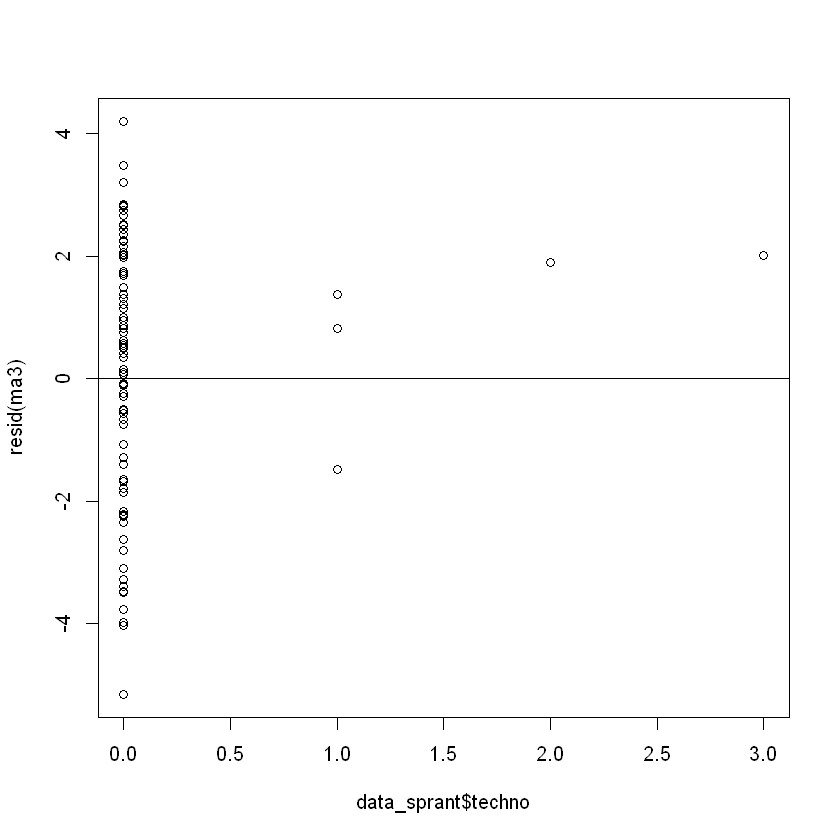

In [11]:
#We dont take mono and tetra
# after selection of factors
ma1 = glmer(prop ~ brachy + solenopsis + pheidole + para + techno + slug + cockroach + (1|plot) , nAGQ=0, weights=nb_essai, family = 'binomial', data = data_sprant)
drop1(ma1, test="Chisq")
summary(ma1)

#remove the variable with the greatest p-value
#pheidole     0.12353    0.24823   0.498  0.61875    
ma2 = glmer(prop ~ brachy + solenopsis + para + techno + slug + cockroach + (1|plot) , nAGQ=0, weights=nb_essai, family = 'binomial', data = data_sprant)
drop1(ma2, test="Chisq")
summary(ma2)
hist(resid(ma2))


plot(resid(ma2)~fitted(ma2))
abline(h=0)
plot(resid(ma2)~data_sprant$techno)
abline(h=0)

r.squaredGLMM(ma2)

#remove the variable with the greatest p-value
#techno        1 635.18  6.255   0.01239 *  
#now depends on chosen alpha, 0.05 or 0.01
ma3 = glmer(prop ~ brachy + solenopsis + para + slug + cockroach + (1|plot) , nAGQ=0, weights=nb_essai, family = 'binomial', data = data_sprant)
drop1(ma3, test="Chisq")
summary(ma3)
hist(resid(ma3))

plot(resid(ma3)~fitted(ma3))
abline(h=0)
plot(resid(ma3)~data_sprant$techno)
abline(h=0)
r.squaredGLMM(ma3)

In [12]:
# we chose to keep alpha = 0.05, keeping T. albipes in the model
summary(ma2)

Generalized linear mixed model fit by maximum likelihood (Adaptive
  Gauss-Hermite Quadrature, nAGQ = 0) [glmerMod]
 Family: binomial  ( logit )
Formula: prop ~ brachy + solenopsis + para + techno + slug + cockroach +  
    (1 | plot)
   Data: data_sprant
Weights: nb_essai

     AIC      BIC   logLik deviance df.resid 
   622.4    643.6   -303.2    606.4       96 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.1129 -1.3588  0.3927  1.4554  3.8302 

Random effects:
 Groups Name        Variance Std.Dev.
 plot   (Intercept) 0.3935   0.6273  
Number of obs: 104, groups:  plot, 5

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.07741    0.30128  -0.257  0.79722    
brachy      -1.20383    0.29186  -4.125 3.71e-05 ***
solenopsis   0.81505    0.13571   6.006 1.90e-09 ***
para         1.65194    0.30316   5.449 5.06e-08 ***
techno       0.51086    0.19907   2.566  0.01028 *  
slug         0.62246    0.14880   4.183 2.88e-05 ***
cockroach    0

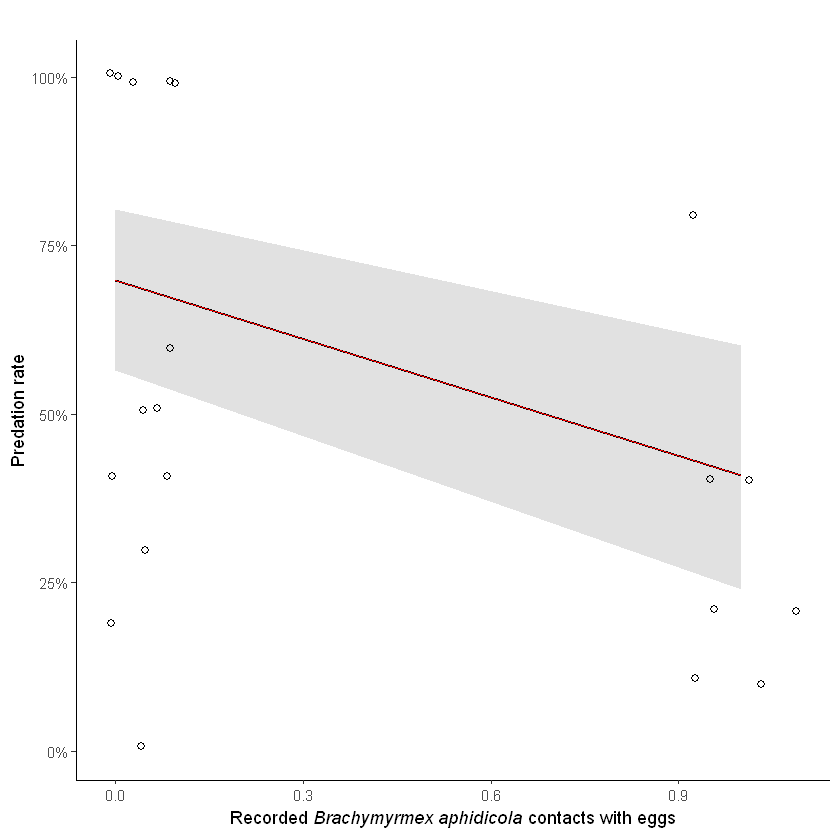

In [21]:
# Brachy

plot_model(ma2, type = c("pred"))[[1]]+
geom_line(col='red')+
geom_point(data=data_ant[data_ant$new_class == 'brachy',],aes(x=sum_variable,y=prop), 
           position = position_jitter(w = 0.1, h = 0.01,seed=42), 
            col= 'black',shape=1, size=2)+
theme_classic()+
labs(title="", x =expression(paste("Recorded ",italic("Brachymyrmex aphidicola")," contacts with eggs")), y = "Predation rate")

ggsave('figs/brachy_contact_pred.png', width = 13, height = 13, unit = 'cm', dpi=300)

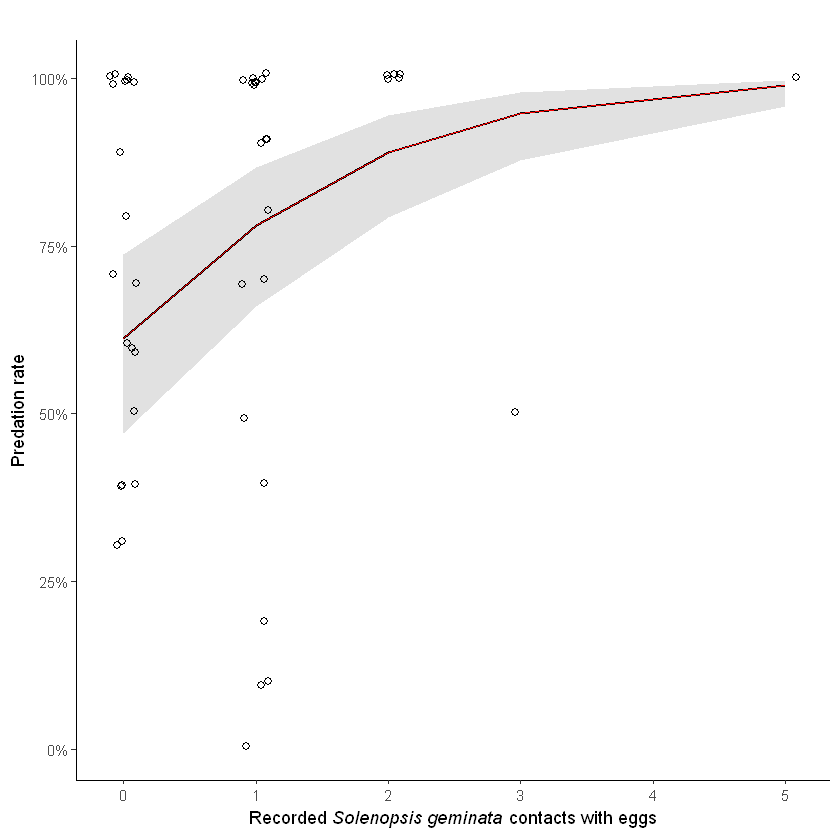

In [22]:
# Solenopsis

plot_model(ma2, type = c("pred"))[[2]]+
geom_line(col='red')+
geom_point(data=data_ant[data_ant$new_class == 'solenopsis',],aes(x=sum_variable,y=prop), 
           position = position_jitter(w = 0.1, h = 0.01,seed=42), 
            col= 'black',shape=1, size=2)+
theme_classic()+
labs(title="", x =expression(paste("Recorded ",italic("Solenopsis geminata")," contacts with eggs")), y = "Predation rate")

ggsave('figs/solenopsis_contact_pred.png', width = 13, height = 13, unit = 'cm', dpi=300)

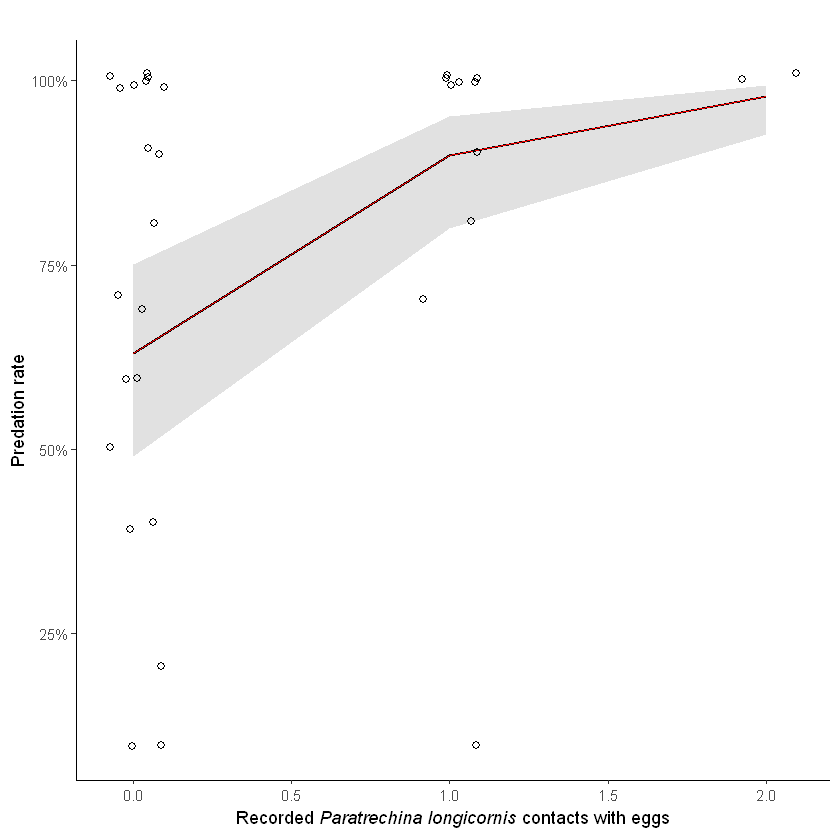

In [23]:
# paratrechina

plot_model(ma2, type = c("pred"))[[3]]+
geom_line(col='red')+
geom_point(data=data_ant[data_ant$new_class == 'para',],aes(x=sum_variable,y=prop), 
           position = position_jitter(w = 0.1, h = 0.01,seed=42), 
            col= 'black',shape=1, size=2)+
theme_classic()+
labs(title="", x =expression(paste("Recorded ",italic("Paratrechina longicornis")," contacts with eggs")), y = "Predation rate")

ggsave('figs/para_contact_pred.png', width = 13, height = 13, unit = 'cm', dpi=300)

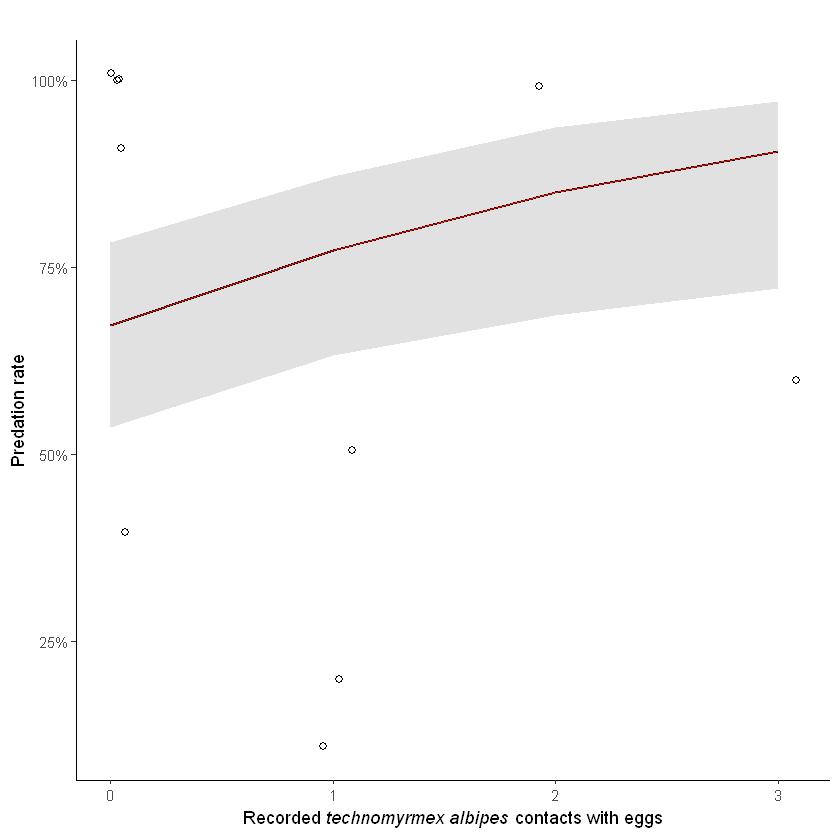

In [24]:
# technomyrmex

plot_model(ma2, type = c("pred"))[[4]]+
geom_line(col='red')+
geom_point(data=data_ant[data_ant$new_class == 'techno',],aes(x=sum_variable,y=prop), 
           position = position_jitter(w = 0.1, h = 0.01,seed=42), 
            col= 'black',shape=1, size=2)+
theme_classic()+
labs(title="", x =expression(paste("Recorded ",italic("technomyrmex albipes")," contacts with eggs")), y = "Predation rate")

ggsave('figs/techno_contact_pred.png', width = 13, height = 13, unit = 'cm', dpi=300)

# GLM with abundance/appearances

In [59]:
library(tidyr)
library(lme4)
library(sjPlot)
library(ggplot2)
# library(MASS)
library(dplyr)
library(MuMIn)
library(pkgcond)

In [60]:
# sentinel preys recap
dataPS = read.table('data/recap_PS_sans_RT.csv', h=T, sep = ',') 

# image analysis recap
data = read.table('data/analyse_clean.csv', h=T, sep = ',')

# cleaner names
data = data %>% 
mutate(name = paste(obj_class, species, sep = "_"))%>%
rename(spot=session)

dataPS_short= dataPS%>%select(spot,weevils_out,eggs_out,plot)

# join
data_temp = inner_join(dataPS_short,data)

Joining, by = "spot"


### All species

`summarise()` has grouped output by 'obj_class', 'name'. You can override using the `.groups` argument.


Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: poisson  ( log )
Formula: sum_cont ~ I(log(sum_ab + 1)) + (1 | plot)
   Data: data_corr

     AIC      BIC   logLik deviance df.resid 
   468.1    477.4   -231.0    462.1      165 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.4996 -0.7383 -0.5649  0.4429  7.2690 

Random effects:
 Groups Name        Variance Std.Dev.
 plot   (Intercept) 0.02193  0.1481  
Number of obs: 168, groups:  plot, 5

Fixed effects:
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)        -1.57482    0.17021  -9.252   <2e-16 ***
I(log(sum_ab + 1))  0.78550    0.04731  16.604   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
            (Intr)
I(lg(s_+1)) -0.819

npar AIC      LRT     Pr(Chi)     
<none>             NA   468.0521      NA           NA
I(log(sum_ab + 1))  1   700.4651 234.413 6.501051e-53

Warning message:
"the null model is correct only if all variables used by the original model remain unchanged."


R2m       R2c      
delta     0.4181240 0.4329689
lognormal 0.4949078 0.5124788
trigamma  0.3223295 0.3337734

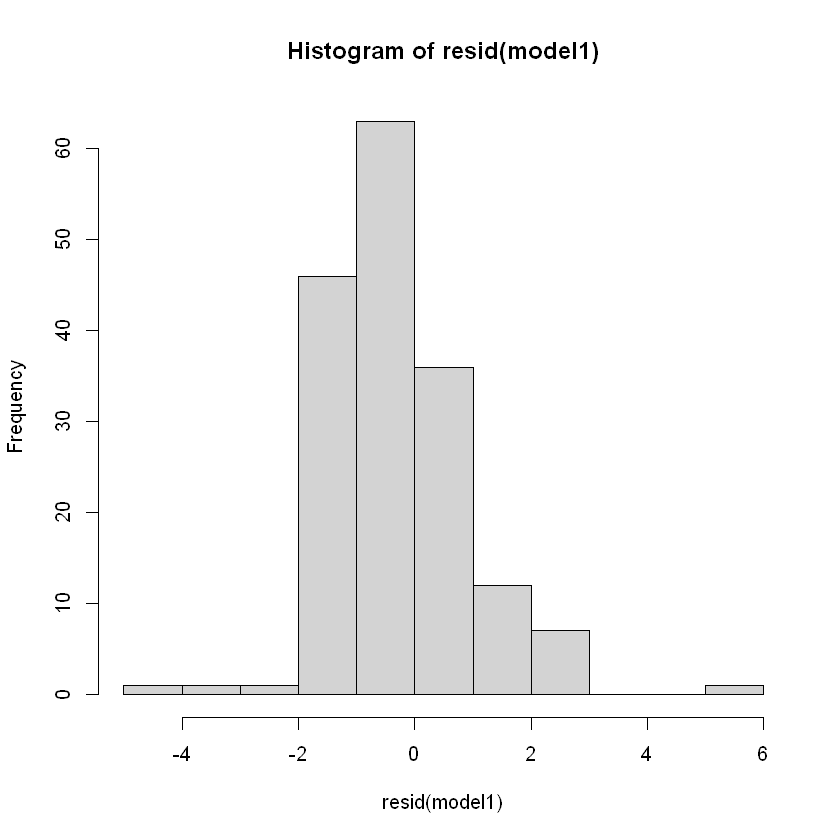

In [61]:
# explore correlation between abundance of a species and contacts with eggs
# are there species that are ofthen seen without contacts or species seen only during contacts ?
# All species
data_corr = data_temp%>%
  filter(name != 'ant_unclear')%>%
  group_by(obj_class, name, plot)%>%
  summarise(sum_ab = sum(abundance_max),sum_cont = sum(contact_egg))

# now fitting an appropriate poisson model
model1<-glmer(sum_cont~I(log(sum_ab+1)) + (1|plot),data=data_corr,family="poisson")
summary(model1)
drop1(model1, test="Chisq")
hist(resid(model1))
r.squaredGLMM(model1)

## Only predators

`summarise()` has grouped output by 'obj_class', 'name'. You can override using the `.groups` argument.
boundary (singular) fit: see help('isSingular')



Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: poisson  ( log )
Formula: sum_cont ~ I(log(sum_ab + 1)) + (1 | plot)
   Data: data_corr

     AIC      BIC   logLik deviance df.resid 
   273.2    281.0   -133.6    267.2       96 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.6498 -0.5851 -0.5851  0.5540  3.2493 

Random effects:
 Groups Name        Variance  Std.Dev. 
 plot   (Intercept) 1.194e-17 3.456e-09
Number of obs: 99, groups:  plot, 5

Fixed effects:
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)        -1.78022    0.21025  -8.467   <2e-16 ***
I(log(sum_ab + 1))  1.02175    0.06635  15.399   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
            (Intr)
I(lg(s_+1)) -0.932
optimizer (Nelder_Mead) convergence code: 0 (OK)
boundary (singular) fit: see help('isSingular')


npar AIC      LRT      Pr(Chi)     
<none>             NA   273.2387       NA           NA
I(log(sum_ab + 1))  1   500.5272 229.2885 8.521418e-52

Warning message:
"the null model is correct only if all variables used by the original model remain unchanged."


R2m       R2c      
delta     0.6359456 0.6359456
lognormal 0.6889521 0.6889521
trigamma  0.5653608 0.5653608

plot sum_ab
1 BM   0     
2 BM   1     
3 BM   2     
4 BM   3     
5 BM   4     
6 BM   5

Warning message in predict.merMod(model1, newdata = MyData, type = "response", se = TRUE):
"unused arguments ignored"


plot sum_ab P1       
1 BM   0      0.1686009
2 BM   1      0.3423238
3 BM   2      0.5180341
4 BM   3      0.6950475
5 BM   4      0.8730362
6 BM   5      1.0518060

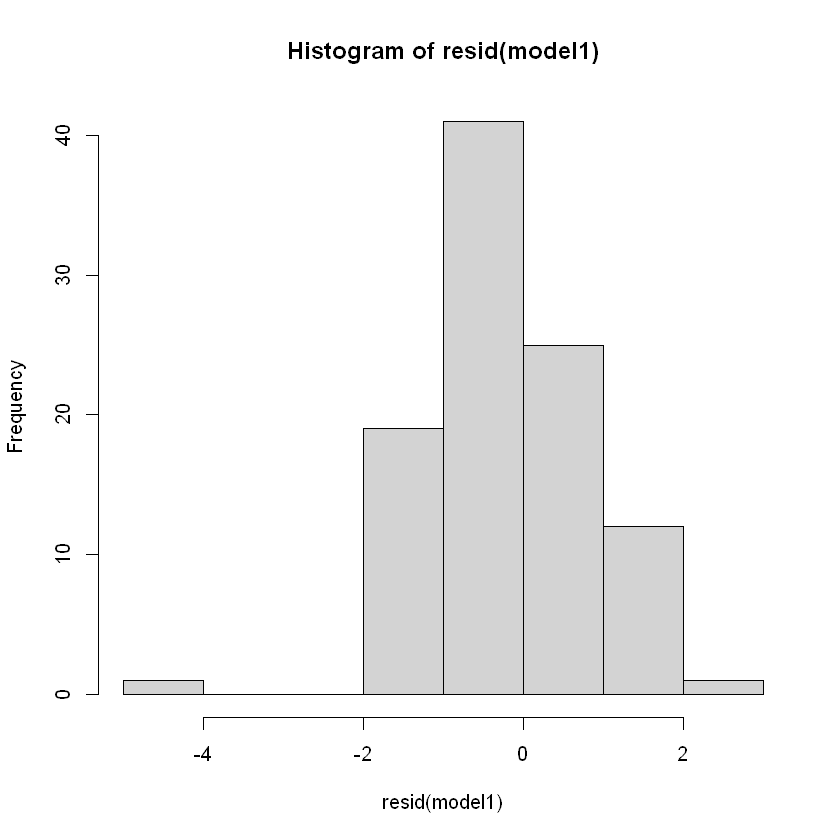

In [62]:
# explore correlation between abundance of a species and contacts with eggs
# are there species that are ofthen seen without contacts or species seen only during contacts ?
# All species
# explore correlation between abundance of a species and contacts with eggs
# are there species that are ofthen seen without contacts or species seen only during contacts ?
# Only 'Predators'
data_corr = data_temp%>%
  filter(obj_class != 'colemboles')%>%
  filter(obj_class != 'lombric')%>%
  filter(obj_class != 'cocci')%>%
  filter(obj_class != 'aphid')%>%
  filter(obj_class != 'iule')%>%
  filter(obj_class != 'cloporte')%>%
  filter(obj_class != 'hemiptere')%>%
  filter(obj_class != 'lepi')%>%
  filter(obj_class != 'ortho')%>%
  filter(obj_class != 'weevil')%>%
  filter(obj_class != 'diptere')%>%
  filter(obj_class != 'hymeno')%>%
  filter(name != 'ant_unclear')%>%
  group_by(obj_class, name,plot)%>%
  summarise(sum_ab = sum(abundance_max),sum_cont = sum(contact_egg))

# now fitting an appropriate poisson model
model1<-glmer(sum_cont~I(log(sum_ab+1)) + (1|plot),data=data_corr,family="poisson")
summary(model1)
drop1(model1, test="Chisq")
hist(resid(model1))
r.squaredGLMM(model1)

n = length(seq(from = 0,to = max(data_corr$sum_ab), by = 1))
plot = rep(c("BM","LP","PC","PE","SL"), each=n)
sum_ab = rep(seq(from = 0,to = max(data_corr$sum_ab), by = 1),times=5)


MyData = data.frame(cbind(plot, sum_ab))
MyData$sum_ab = as.numeric(as.character(MyData$sum_ab))
MyData$plot = as.factor(as.character(MyData$plot))
MyData = as.data.frame(MyData)

head(MyData)

P1 <- predict(model1, newdata = MyData, type = "response", se = TRUE)
P1<-as.data.frame(P1)
P1<-cbind(MyData,P1)

head(P1)

In [ ]:
value_jitter=0.0
library(ggrepel)

ggplot(data_corr, aes(x=sum_ab, y = sum_cont))+
  geom_point(aes(col= obj_class),position=position_jitter(height=value_jitter, width=value_jitter)) +
  labs(x="Abundance of a species",y= "Number of Contacts with eggs") +
  theme_classic() +
  theme(legend.position = "none") +
  geom_line(data=P1,aes(x=sum_ab,y=P1),colour="gray",size=1.5) +
  geom_line(data=P1,aes(x=sum_ab,y=P1+1.96*(sd(P1)/sqrt(99))), colour="gray", linetype = "dashed", size=1) +
  geom_line(data=P1,aes(x=sum_ab,y=P1-1.96*(sd(P1)/sqrt(99))), colour="gray", linetype = "dashed", size=1) +
  scale_x_continuous(trans='log10') +
#   scale_y_continuous(trans='log10') +
  geom_text_repel(aes(label=name, col= obj_class),hjust=1,vjust=1,position=position_jitter(width=value_jitter,height=value_jitter))+
  annotate("text", x=6, y=20, label= "R²=0.64")

# ggsave('figs/abundance_contacts_plot.png', width = 13, height = 13, unit = 'cm', dpi=300)


## Only non-predators

`summarise()` has grouped output by 'obj_class', 'name'. You can override using the `.groups` argument.
boundary (singular) fit: see help('isSingular')



Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: poisson  ( log )
Formula: sum_cont ~ I(log(sum_ab + 1)) + (1 | plot)
   Data: data_corr

     AIC      BIC   logLik deviance df.resid 
   100.5    107.2    -47.2     94.5       66 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-0.8112 -0.5316 -0.3887 -0.0260  3.5676 

Random effects:
 Groups Name        Variance Std.Dev.
 plot   (Intercept) 0        0       
Number of obs: 69, groups:  plot, 5

Fixed effects:
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -2.3636     0.3584  -6.595 4.24e-11 ***
I(log(sum_ab + 1))   0.6834     0.0997   6.855 7.14e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
            (Intr)
I(lg(s_+1)) -0.860
optimizer (Nelder_Mead) convergence code: 0 (OK)
boundary (singular) fit: see help('isSingular')


npar AIC      LRT      Pr(Chi)     
<none>             NA   100.4990       NA           NA
I(log(sum_ab + 1))  1   132.8454 34.34636 4.612624e-09

Warning message:
"the null model is correct only if all variables used by the original model remain unchanged."


R2m       R2c      
delta     0.1801389 0.1801389
lognormal 0.2956416 0.2956416
trigamma  0.0755021 0.0755021

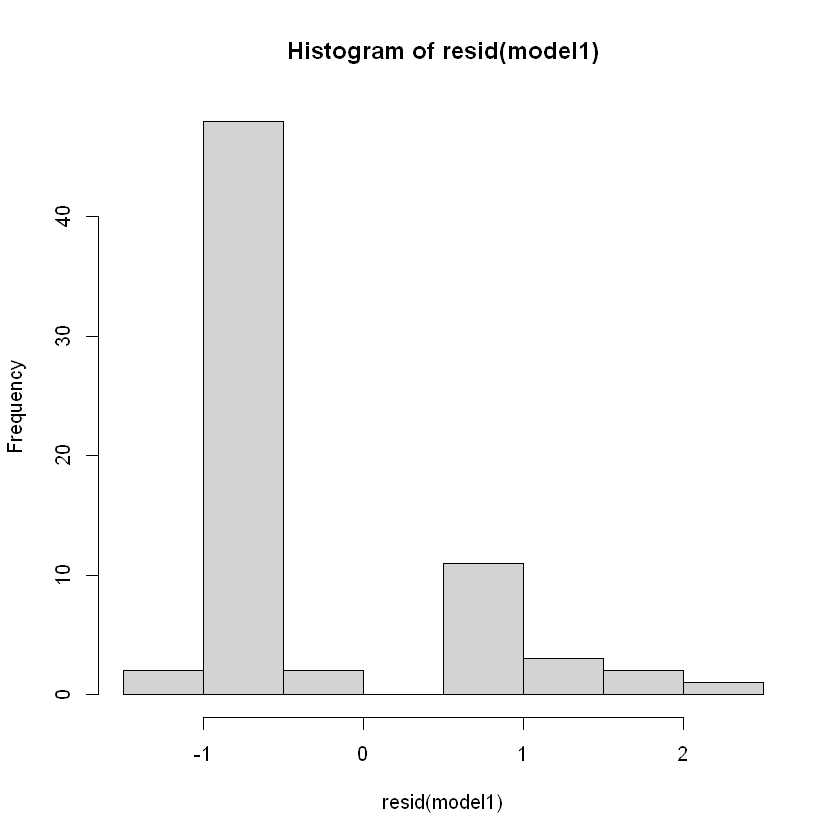

In [64]:
# explore correlation between abundance of a species and contacts with eggs
# are there species that are ofthen seen without contacts or species seen only during contacts ?
# only 'non-predator' species
data_corr = data_temp%>%
  filter(obj_class =='lombric'
         | obj_class == 'cocci'
         | obj_class == 'aphid'
         | obj_class == 'iule'
         | obj_class == 'cloporte'
         | obj_class == 'hemiptere'
         | obj_class == 'lepi'
         | obj_class == 'ortho'
         | obj_class == 'weevil'
         | obj_class == 'diptere'
         | obj_class == 'hymeno'
         | obj_class == 'colemboles')%>%
#filter(obj_class != 'colemboles')%>%  # removing colembole because outlier
filter(name != 'ant_unclear')%>%
  group_by(obj_class, name,plot)%>%
  summarise(sum_ab = sum(abundance_max),sum_cont = sum(contact_egg))

# now fitting an appropriate poisson model
model1<-glmer(sum_cont~I(log(sum_ab+1)) + (1|plot),data=data_corr,family="poisson")
summary(model1)
drop1(model1, test="Chisq")
hist(resid(model1))
r.squaredGLMM(model1)